<a href="https://colab.research.google.com/github/ridhwan497/sdg4-nlp/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np

import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
!pip install pdfx

In [ ]:
#!pip install PyPDF2

In [ ]:
!pip install pypdf


  Using cached pypdf-4.3.1-py3-none-any.whl.metadata (7.4 kB)
Using cached pypdf-4.3.1-py3-none-any.whl (295 kB)


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_documentation(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join([para.get_text() for para in paragraphs])
        return text
    else:
        return None

# Example usage
documentation_url = "https://scikit-learn.org/stable/modules/linear_model.html"
# sometimes we encounter issues with connecting to the website.
#Maybe we should try uploading the pdf? see if that streamlines the result
raw_data = scrape_documentation(documentation_url)


In [ ]:
#!pip install PyPDF2

In [ ]:
#Alternative data ingestion

import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the PDF file
pdf_file = open("scikit_learn_tutorial.pdf", "rb")
pdf_reader = PyPDF2.PdfReader(pdf_file)

# Extract text from the PDF file
text = ""
for page in range(len(pdf_reader.pages)):
    text += pdf_reader.pages[page].extract_text()

##Step 2: Cleaning the Text

The cleaning step involves removing unwanted elements such as HTML tags, special characters, and numbers.


[ ]


In [ ]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

cleaned_data = clean_text(raw_data)

###Step 3: Normalizing the Text

Normalization includes converting text to lowercase, tokenization, removing stopwords, and lemmatization.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def normalize_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

normalized_data = normalize_text(cleaned_data)

In [ ]:
'''

# Preprocess the text
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
'''
tokens = word_tokenize(raw_data )
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

normalized_data = []
for token in tokens:
    if token not in stop_words:
        normalized_data .append(lemmatizer.lemmatize(token))

# Convert the preprocessed text into a numerical representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join( normalized_data)])

# Now you can use X to train your machine learning model





###Step 4:Implementing TF-IDF

will help in transforming the raw text data into a numerical format where each term's importance is weighted based on its frequency and the number of documents it appears in.

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Cleaned and normalized text data
documents = normalized_data  # Dont add a list of lists silly

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Example: Print TF-IDF scores for the first document
for word_id in tfidf_matrix[0].nonzero()[1]:
    print(f"{feature_names[word_id]}: {tfidf_matrix[0, word_id]}")


section: 1.0


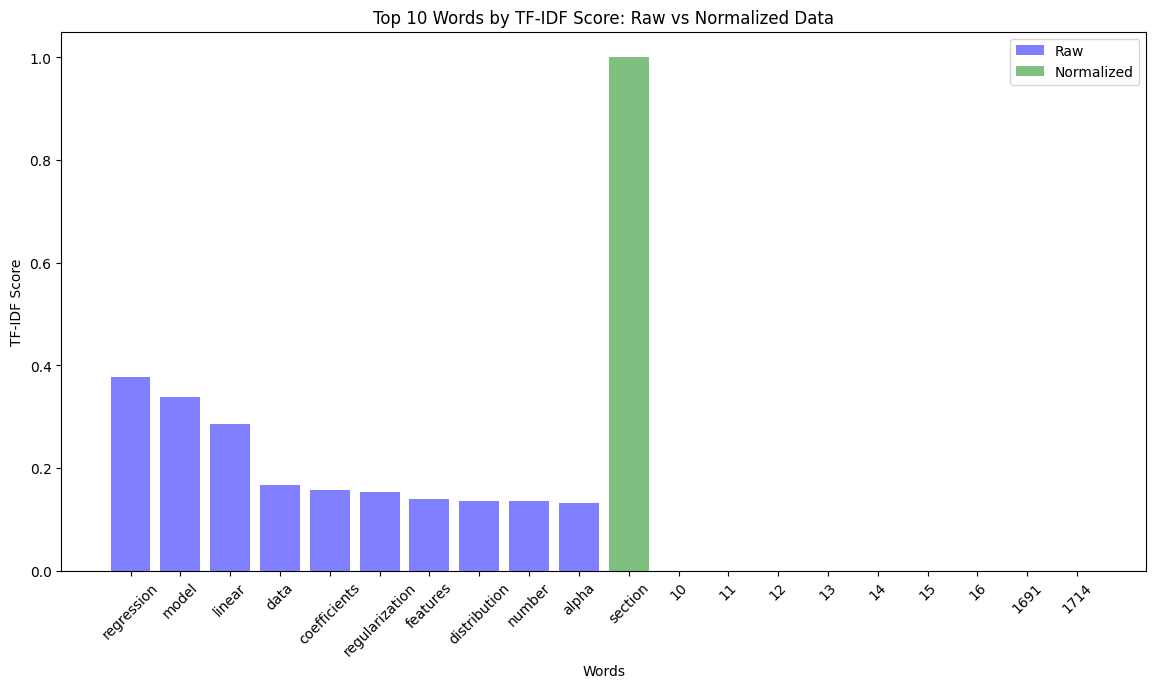

In [ ]:
# Initialize the TF-IDF vectorizer for raw data
vectorizer_raw = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the raw data
tfidf_matrix_raw = vectorizer_raw.fit_transform([cleaned_data])

# Extract the TF-IDF scores and feature names
tfidf_scores_raw = tfidf_matrix_raw.toarray().flatten()
feature_names_raw = vectorizer_raw.get_feature_names_out()

# Create a dictionary of words and their TF-IDF scores
tfidf_dict_raw = {feature_names_raw[i]: tfidf_scores_raw[i] for i in range(len(feature_names_raw))}

# Initialize the TF-IDF vectorizer for cleaned data
vectorizer_cleaned = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the cleaned data
tfidf_matrix_cleaned = vectorizer_cleaned.fit_transform(normalized_data)

# Extract the TF-IDF scores and feature names
tfidf_scores_cleaned = tfidf_matrix_cleaned.toarray().flatten()
feature_names_cleaned = vectorizer_cleaned.get_feature_names_out()

# Create a dictionary of words and their TF-IDF scores
tfidf_dict_cleaned = {feature_names_cleaned[i]: tfidf_scores_cleaned[i] for i in range(len(feature_names_cleaned))}

# Sort the dictionaries by TF-IDF scores in descending order
sorted_tfidf_raw = sorted(tfidf_dict_raw.items(), key=lambda x: x[1], reverse=True)
sorted_tfidf_cleaned = sorted(tfidf_dict_cleaned.items(), key=lambda x: x[1], reverse=True)

# Select top N words for visualization
top_n = 10
top_words_raw = sorted_tfidf_raw[:top_n]
top_words_cleaned = sorted_tfidf_cleaned[:top_n]

# Plotting
plt.figure(figsize=(14, 7))

# Plot for raw data
words_raw, scores_raw = zip(*top_words_raw)
plt.bar(words_raw, scores_raw, alpha=0.5, label='Raw', color='blue')

# Plot for cleaned data
words_cleaned, scores_cleaned = zip(*top_words_cleaned)
plt.bar(words_cleaned, scores_cleaned, alpha=0.5, label='Normalized', color='green')

plt.title('Top 10 Words by TF-IDF Score: Raw vs Normalized Data')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np



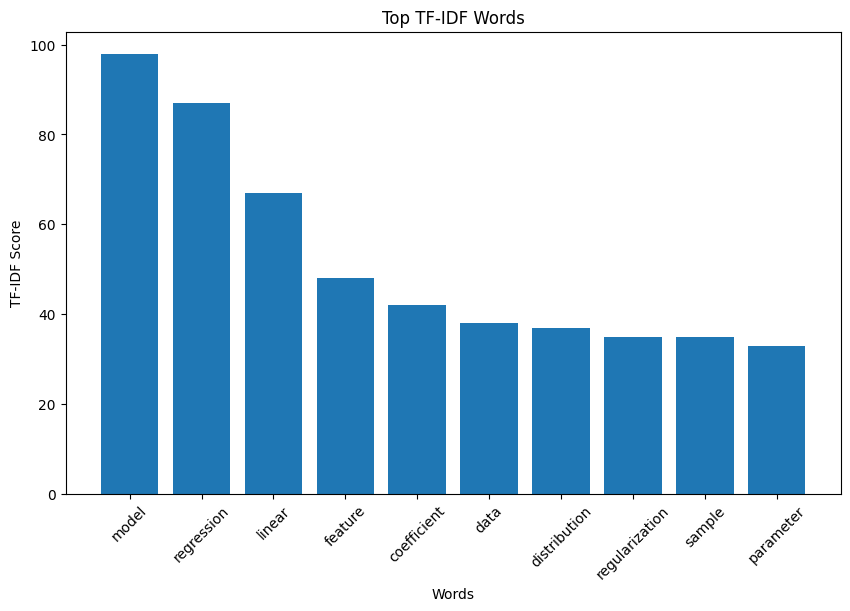

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
'''
# 1. Distribution of TF-IDF Scores
tfidf_values = tfidf_matrix.toarray().flatten()
plt.figure(figsize=(10, 6))
plt.hist(tfidf_values, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
'''
# 2. Top Words by TF-IDF
top_n = 10

# Convert tfidf_matrix to a dictionary
tfidf_dict = {}
for i, col in enumerate(tfidf_matrix.toarray().T):
    tfidf_dict[feature_names[i]] = np.sum(col)

sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)
top_words = sorted_tfidf[:top_n]

words, scores = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, scores)
plt.title('Top TF-IDF Words')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

DESCRIPTIVE DATA ANALYSIS

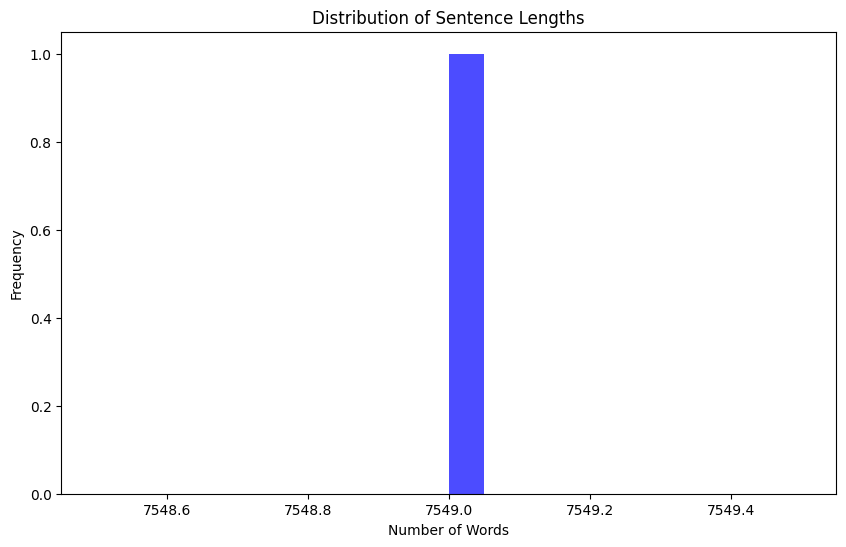

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Assuming normalized_data is a list of strings where each string is a document
# Concatenate all documents into a single string for tokenization
all_text = ' '.join(normalized_data)

# Tokenize the normalized data
tokens = word_tokenize(all_text)

# Basic statistics
total_words = len(tokens)
unique_words = len(set(tokens))
average_word_length = sum(len(word) for word in tokens) / total_words

# Frequency analysis
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(10)

# Text length distribution
sentences = cleaned_data.split('.')
sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]

# Plotting the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


###Normalized Data Analysis

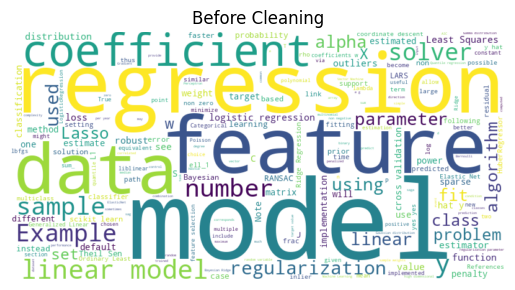

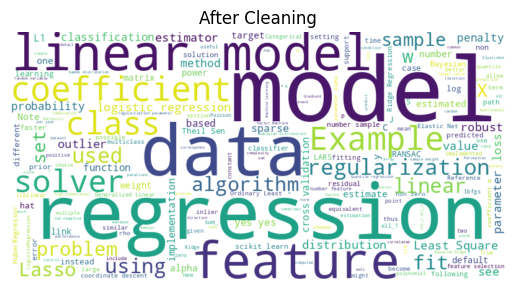

In [ ]:
# Create a word cloud before cleaning
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(raw_data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Before Cleaning")
plt.show()

# Create a word cloud after cleaning
cleaned_text = " ".join(normalized_data)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("After Cleaning")
plt.show()

In [ ]:
import random
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForQuestionAnswering
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

/usr/local/lib/python3.10/site-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you a

In [134]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
from nltk.tokenize import sent_tokenize
# Split the preprocessed text into individual sentences
sentences = sent_tokenize(normalize_text(cleaned_data))

# Create a list of questions and their corresponding answers
questions = []
answers = []
for i, sentence in enumerate(sentences):
    if sentence.endswith('?'):
        questions.append(sentence)
        answers.append(i)



In [ ]:
#!pip install pdfplumber
'''
!pip install -q condacolab
import condacolab
condacolab.install()
'''
!conda install -c conda-forge pdfplumber -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pdfplumber


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       h04ea711_2         348 KB  conda-forge
    ca-certificates-2024.7.4   |       hbcca054_0         151 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    cryptography-43.0.0        |  py310h4909e49_0         1.4 MB  conda-forge
    expat-2.6.2                |       h59595ed_0         134 KB  co

In [ ]:
# Read the manual text
import pdfplumber
with pdfplumber.open("/content/Questions manual.pdf") as pdf:
    questions = ""
    for page in pdf.pages:
        questions += page.extract_text()
        # Load the PDF file


In [ ]:
# Read the manual text
with pdfplumber.open("/content/answers_scikit_learn.pdf") as pdf:
    answers = ""
    for page in pdf.pages:
        answers += page.extract_text()


In [ ]:
# Split the text into individual questions
'''
question = [q.strip() for q in questions.split('\n') if q.strip()]

# Create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

    # Fit the vectorizer to the questions and transform them into vectors
question_vectors = vectorizer.fit_transform(questions)
'''
# Assuming 'questions' is a string containing the extracted text from the PDF
# If 'questions' is already a list, we don't need to split it again
if isinstance(questions, str):
    question = [q.strip() for q in questions.split('\n') if q.strip()]
else:
    question = questions
    #print("couldnt be split. already a list");

# Create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the questions and transform them into vectors
question_vectors = vectorizer.fit_transform(question)

# Optional: Inspect the resulting vectors
print(question_vectors.toarray())


[[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  1 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
  0 0 0 2 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0
  0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
  0 0 0 2 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
  0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
  0 0 0 2 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0
  0 0 0 2 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0

In [ ]:
# Split the text into individual answers
'''
answers = [a.strip() for a in text3.split('\n') if a.strip()]

# Create a CountVectorizer object for answers
from sklearn.feature_extraction.text import CountVectorizer
answer_vectorizer = CountVectorizer()

# Fit the vectorizer to the answers and transform them into vectors
answer_vectors = answer_vectorizer.fit_transform(answers)
'''
if isinstance(answers, str):
    answer = [q.strip() for q in answers.split('\n') if q.strip()]
else:
    answer = answers
    #print("couldnt be split. already a list");

# Create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the questions and transform them into vectors
answer_vectors = vectorizer.fit_transform(answer)

# Optional: Inspect the resulting vectors
print(answer_vectors.toarray())


[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1
  0 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
  0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1
  0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1
  0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
  0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 1 0 0 1 0
  0 0 0 0 0 0]
 [0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
  1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
'''
# Load the questions and answers
indiv_questions = [
    "1. How do I load a dataset in scikit-learn?",
    "2. How can I split my dataset into training and testing sets?",
    "3. What is the purpose of the fit() method in scikit-learn?",
    "4. How do I make predictions on new data using a trained model in scikit-learn?",
    "5. What is the purpose of the transform() method in scikit-learn?",
    "6. How do I evaluate the performance of a classification model using accuracy score in scikit-learn?",
    "7. What is the purpose of the cross_val_score() function in scikit-learn?",
    "8. How do I handle missing values in a dataset in scikit-learn?",
    "9. What is the purpose of the Pipeline class in scikit-learn?",
    "10. How do I use GridSearchCV to tune hyperparameters of a model in scikit-learn?"
]

indiv_answers = [
    "1. You can load a dataset in scikit-learn using the load_iris() function, which loads the Iris dataset.",
    "2. You can split your dataset into training and testing sets using the train_test_split() function from scikit-learn.",
    "3. The fit() method is used to train a machine learning model on a dataset.",
    "4. You can make predictions on new data using a trained model in scikit-learn by calling the predict() method.",
    "5. The transform() method is used to apply a transformation to a dataset.",
    "6. You can evaluate the performance of a classification model using accuracy score in scikit-learn by calling the accuracy_score() function from sklearn.metrics.",
    "7. The cross_val_score() function is used to evaluate the performance of a model using cross-validation.",
    "8. You can handle missing values in a dataset in scikit-learn using the SimpleImputer class from sklearn.impute.",
    "9. The Pipeline class is used to chain multiple data processing steps into a single workflow.",
    "10. You can use GridSearchCV to tune hyperparameters of a model in scikit-learn by specifying a parameter grid and a scoring function."
]
'''


In [ ]:
import numpy as np
print("Shape of question_vectors:", question_vectors.shape)
print("Shape of answers:", answer_vectors.shape)

Shape of question_vectors: (10, 49)
Shape of answers: (10, 78)


In [ ]:
# Train a MultinomialNB classifier on the training data
classifier = MultinomialNB()
classifier.fit(question_vectors, answer_vectors.toarray().argmax(axis=1))

# Make predictions on the answers
predictions = classifier.predict(question_vectors)

# Evaluate the accuracy of the model
accuracy = accuracy_score(answer_vectors.toarray().argmax(axis=1), predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(question_vectors, answers)

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(question_vectors, answers)

DecisionTreeClassifier()

In [ ]:
# Evaluate the classifier on the testing data
accuracy = classifier.score(question_vectors, answers)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the questions and answers
vectorizer.fit(questions + answers)

# Transform the questions and answers into vectors
question_vectors = vectorizer.transform(questions)
answer_vectors = vectorizer.transform(answers)



In [ ]:
# Define a function to find the most similar answer to a given question
def find_best_answer(question):
    question_vector = vectorizer.transform([question])
    similarities = cosine_similarity(question_vector, answer_vectors).flatten()
    best_answer_index = np.argmax(similarities)
    return answers[best_answer_index]

# Test the model
print(find_best_answer("How do I load a dataset in scikit-learn?"))

1. You can load a dataset in scikit-learn using the load_iris() function, which loads the Iris dataset.


In [ ]:
print(find_best_answer("How do I use GridSearchCV to tune hyperparameters of a model in scikit-learn?"))

10. You can use GridSearchCV to tune hyperparameters of a model in scikit-learn by specifying a parameter grid and a scoring function.


In [ ]:
print(find_best_answer("What is the purpose of the transform() method in scikit-learn?"))

6. You can evaluate the performance of a classification model using accuracy score in scikit-learn by calling the accuracy_score() function from sklearn.metrics.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
questions = [q.strip() for q in text.split('\n') if q.strip()]
vectorizer = CountVectorizer()
vectorizer.fit(questions)
# Create a CountVectorizer object

#question_vectors = vectorizer.fit_transform(questions)


vectorizer = CountVectorizer()
vectorizer.fit(questions)

question_vectors = vectorizer.transform(questions)
answer_vectors = vectorizer.transform(answers)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def ask_question(question):
    # Transform the question into a vector
    question_vectors = vectorizer.transform([questions])

    # Calculate the cosine similarity between the question vector and the answer vectors
    similarities = cosine_similarity(question_vectors, answer_vectors).flatten()

    # Get the index of the most similar answer
    most_similar_index = np.argmax(similarities)

    # Get the predicted answer
    predicted_answer = answers[most_similar_index]

    return predicted_answer

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to extract features from the text
def extract_features(preprocessed_text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        return_attention_mask=True,
        return_tensors='pt'
    )
    outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    features = outputs.last_hidden_state[:, 0, :]
    return features

# Define a function to ask a question
def ask_question(question):
    features = extract_features(question)
    # Use the features to predict the answer
    #...

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to extract features from the text
def extract_features(preprocessed_text):
    inputs = tokenizer.encode_plus(
       preprocessed_text,
        add_special_tokens=True,
        max_length=512,
        return_attention_mask=True,
        return_tensors='pt'
    )
    outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    features = outputs.last_hidden_state[:, 0, :]
    return features

# Define a function to ask a question
def ask_question(question):
    features = extract_features(question)
    # Use the features to predict the answer span
    answer_span = predict_answer_span(features)
    # Retrieve the answer from the manual
    answer = retrieve_answer_from_preprocessed_text(answer_span)
    return answer

# Define a function to predict the answer span
def predict_answer_span(features):
    # Use a machine learning model to predict the answer span
    #...
    return answer_span

# Define a function to retrieve the answer from the manual
def retrieve_answer_from_preprocessed_text(answer_span):
    # Use the answer span to retrieve the answer from the manual
    #...
    return answer

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
def predict_answer_span(features):
    # ...

    # Find the longest span
    longest_span = find_longest_span(start_scores, end_scores)

    # Check if longest_span is not None
    if longest_span is not None:
        # Return the start and end indices of the longest span
        return longest_span[0], longest_span[-1]
    else:
        # Return None or an appropriate default value
        return None

In [ ]:
def retrieve_answer_from_preprocessed_text(answer_span, preprocessed_text):
    # Extract the text corresponding to the answer span

     # Join the tokens back into a string

    answer_text = ' '.join(tokens[answer_span[0]:answer_span[1]+1])
    return answer_text

In [ ]:
print(ask_question("What is the purpose of the fit method in scikit-learn?",context));

to train a machine learning model on a dataset


In [ ]:
print(ask_question("How do I make predictions on new data using a trained model in scikit-learn?",context))

passing the input data and corresponding labels to the model


In [ ]:
import pdfplumber
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Read the manual text from the PDF file
with pdfplumber.open("scikit_learn_tutorial.pdf") as pdf:
    manual_text = ""
    for page in pdf.pages:
        manual_text += page.extract_text()

# Preprocess the manual text
tokens = word_tokenize(manual_text.lower())
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]
preprocessed_text = ' '.join(tokens)

# Define a function to retrieve answers
def retrieve_answer(question):
    # Preprocess the question text
    question_tokens = word_tokenize(question.lower())
    stop_words = set(stopwords.words('english'))
    question_tokens = [token for token in question_tokens if token not in stop_words]

    # Split the manual text into sentences
    sentences = sent_tokenize(preprocessed_text)

    # Initialize the best match and its score
    best_match = ""
    best_score = 0

    for sentence in sentences:
        # Calculate the similarity between the question and the sentence
        sentence_tokens = word_tokenize(sentence.lower())
        sentence_tokens = [token for token in sentence_tokens if token not in stop_words]
        sentence_text = ' '.join(sentence_tokens)
        similarity = len(set(question_tokens) & set(sentence_tokens))

        # Update the best match if the similarity is higher
        if similarity > best_score:
            best_score = similarity
            best_match = sentence

    # Return the best match
    return best_match



# Test the retrieve_answer function
question = "What is the Supervised learning?"
answer = retrieve_answer(question)
print(answer)


.................................................................................................................................. 16 use estimator api ...................................................................................................................................... 16 guiding principles .......................................................................................................................................... 17 steps using estimator api .......................................................................................................................... 18 supervised learning example ........................................................................................................................ 18 unsupervised learning example ................................................................................................................... 23 5. scikit-learn — conventions ..................................................................

In [ ]:
def retrieve_answer(question):
    # Preprocess the question text
    question_tokens = word_tokenize(question.lower())
    stop_words = set(stopwords.words('english'))
    question_tokens = [token for token in question_tokens if token not in stop_words]

    # Split the manual text into sentences
    sentences = sent_tokenize(preprocessed_text)

    # Initialize the best match and its score
    best_match = ""
    best_score = 0

    for sentence in sentences:
        # Calculate the similarity between the question and the sentence
        sentence_tokens = word_tokenize(sentence.lower())
        sentence_tokens = [token for token in sentence_tokens if token not in stop_words]
        sentence_text = ' '.join(sentence_tokens)
        similarity = len(set(question_tokens) & set(sentence_tokens))

        # Update the best match if the similarity is higher
        if similarity > best_score:
            best_score = similarity
            best_match = sentence

    # Return the first sentence in the best match
    return best_match.split('.')[0] + '.'

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch.nn import CrossEntropyLoss
import torch.nn as nn
import nltk
nltk.download('punkt')
import pdfplumber

# Read the manual text from the PDF file
with pdfplumber.open("scikit_learn_tutorial.pdf") as pdf:
    manual_text = ""
    for page in pdf.pages:
        manual_text += page.extract_text()

# Split the manual text into individual sentences
sentences = nltk.sent_tokenize(manual_text)

# Create a list of questions and their corresponding answers
questions = []
answers = []
for sentence in sentences:
    # For simplicity, let's assume the first sentence is the question
    # and the remaining sentences are the answers
    if sentence.endswith('?'):
        questions.append(sentence)
        answers.append(' '.join([s for s in sentences if s!= sentence]))

# Create a custom dataset class for our data
class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_len):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        encoding = self.tokenizer.encode_plus(
            question,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        label = torch.tensor(answers.index(answer))

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': label
        }

# Set the maximum sequence length
max_len = 512

# Create a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create a dataset and data loader for our data
dataset = QADataset(questions, answers, tokenizer, max_len)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Create a BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Freeze the BERT model's weights
for param in model.parameters():
    param.requires_grad = False

# Create a custom classification head
class ClassificationHead(nn.Module):
    def __init__(self):
        super(ClassificationHead, self).__init__()
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(model.config.hidden_size, len(answers))

    def forward(self, x):
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Create the classification head
classification_head = ClassificationHead()

# Set the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model and classification head to the device
model.to(device)
classification_head.to(device)

# Set the loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = torch.optim.Adam(classification_head.parameters(), lr=1e-5)

# Train the model
for epoch in range(5):
    model.train()
    classification_head.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        outputs = classification_head(pooled_output)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}')

# Evaluate the model
# Evaluate the model
model.eval()
classification_head.eval()
test_questions = ['What is the purpose of the fit method in scikit-learn?']
test_answers = []
with torch.no_grad():
    encoding = tokenizer.encode_plus(
        test_questions[0],
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].flatten().to(device)
    attention_mask = encoding['attention_mask'].flatten().to(device)

    outputs = model(input_ids.unsqueeze(0), attention_mask=attention_mask.unsqueeze(0))
    pooled_output = outputs.pooler_output
    outputs = classification_head(pooled_output)
    _, predicted = torch.max(outputs, dim=1)

    print(f'Predicted answer: {answers[predicted.item()]}')